In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def myprob(distance, angle):
    x = distance*np.power((angle+1), 0.5)
    result = 1.0646383882981121*np.exp(-0.0247111*x)
    return result

def nn_prob(shot_data):
    theta1 = np.load('./Neural Net/xG_theta1.npy')
    theta2 = np.load('./Neural Net/xG_theta2.npy')
    X_cv = shot_data.as_matrix(columns=['x', 'y', 'Header',
                                        'Distance', 'Angle'])

    X_cv = np.c_[np.ones(X_cv.shape[0]), X_cv]

    m = X_cv.shape[0]

    a_1 = X_cv.T
    z_2 = np.dot(theta1, a_1)
    a_2 = sigmoid(z_2)
    # WILL ADD A BIAS UNIT SOON
    z_3 = np.dot(theta2, a_2)
    a_3 = sigmoid(z_3)
    h_theta = a_3
    return h_theta.T

In [149]:
x = np.linspace(-366/2, 0, num=100)
y = np.linspace(0.01, 250, num=100)
grid = np.array(np.meshgrid(x, y)).T.reshape(-1, 2)
x_grid = grid[:,0]
y_grid = grid[:,1]
distance = np.sqrt(x_grid*x_grid + y_grid*y_grid)
angle = np.arctan((np.absolute(x_grid)/y_grid))
shot = np.ones_like(x_grid)

In [150]:
data = pd.DataFrame({'x': x_grid, 'y': y_grid, 'Header':shot, 'Distance': distance, 'Angle': angle})
data.head()

,Angle,Distance,Header,x,y
0,1.570742,183.000000,1.0,-183.0,0.010000
1,1.556944,183.017559,1.0,-183.0,2.535152
2,1.543151,183.069950,1.0,-183.0,5.060303
3,1.529369,183.157143,1.0,-183.0,7.585455
4,1.515603,183.279089,1.0,-183.0,10.110606


In [151]:
data['Proba_exp'] = nn_prob(data)

In [152]:
data.x.values.shape
np.concatenate((data.x.values, data.x.values), axis=0).shape

(20000,)

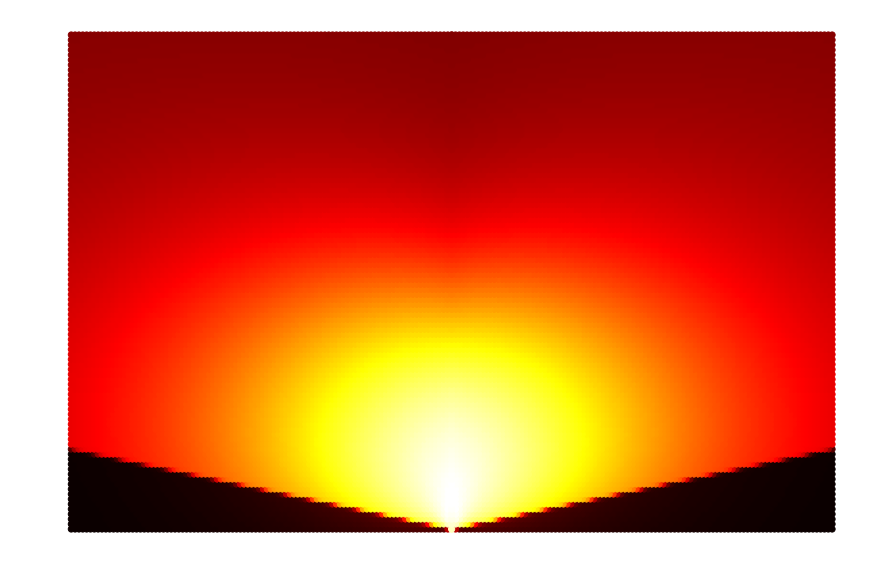

In [155]:
plt.figure(figsize=(15,10))
plt.scatter(np.concatenate((data.x.values, data.x.values*-1), axis=0), np.concatenate((data.y.values, data.y.values), axis=0), c=np.concatenate((data.Proba_exp.values, data.Proba_exp.values), axis=0), cmap='hot')
plt.axis('off')
plt.savefig('heatmap.png')

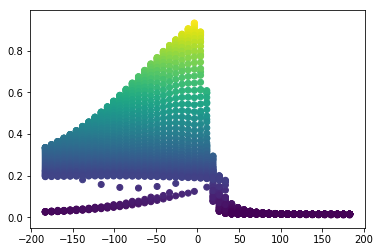

In [138]:
plt.scatter(data.x.values, data.Proba_exp.values, c=data.Proba_exp)